In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import distances
import flag_mean
from mpl_toolkits import mplot3d

In [13]:
def generate_gr_lattice(m,n, eps=.1, num=4, distance='chordal'):
    sub1 = np.random.random((m,n))
    subspaces=[]
    subspaces.append(np.linalg.qr(sub1)[0])
    for i in range(num-1):
        sub = subspaces[0]
        subspaces.append(np.linalg.qr(sub+ eps*np.random.random((m,n)))[0])
    for i in range(num):
        for j in range(num):
            sub = distances.geodesic(subspaces[i], subspaces[j], .25)
            subspaces.append(np.linalg.qr(sub)[0])
            sub = distances.geodesic(subspaces[i], subspaces[j], .5)
            subspaces.append(np.linalg.qr(sub)[0])
            sub = distances.geodesic(subspaces[i], subspaces[j], .75)
            subspaces.append(np.linalg.qr(sub)[0])
    mean = flag_mean.flag_mean(subspaces)
    subspaces.append(mean)
    if distance == 'chordal':
        D = distances.chordal_distance(subspaces,subspaces)
    elif distance == 'geodesic':
        D = distances.geodesic_distance(subspaces,subspaces)
    elif distance == 'angle':
        D = distances.prin_angle_distance(subspaces,subspaces)
    else:
        print('Invalid distance metric selected')
        return
    embed = distances.mds(D, eigplot=True)
    count = 0
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    fig.suptitle('MDS embedding, eps = %.2f' % eps)
    for i in range(num):
        for j in range(num):
            idx = [i, 3*count+num, 3*count+num+1, 3*count+num+2, j]
            ax.plot3D(embed[idx,0], embed[idx,1], embed[idx,2],'bo-')
            count += 1
    ax.plot3D(embed[0:num+1,0], embed[0:num+1,1], embed[0:num+1,2],'ko')
    ax.plot3D([embed[-1,0]], [embed[-1,1]], [embed[-1,2]], 'ro')
    plt.show()
    return subspaces

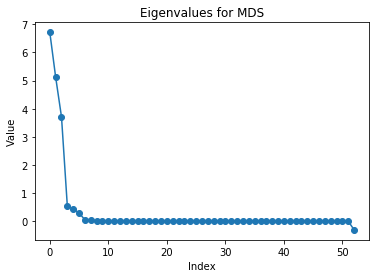

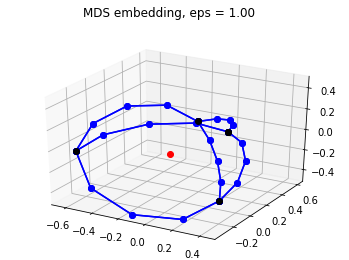

In [14]:
sub = generate_gr_lattice(10,2, eps=1)

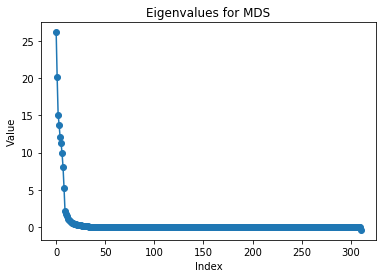

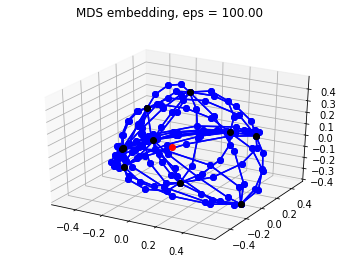

In [15]:
sub = generate_gr_lattice(10,2, eps=100, num=10)

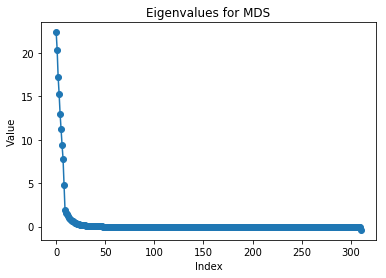

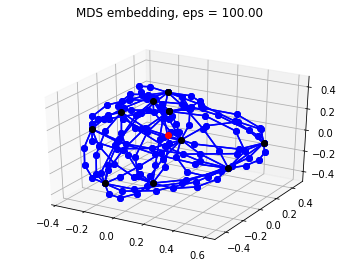

In [16]:
sub = generate_gr_lattice(10,2, eps=100, num=10)

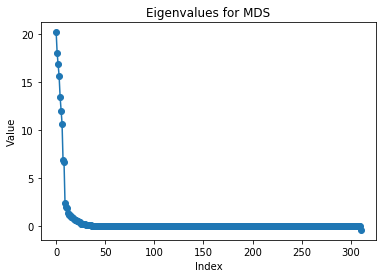

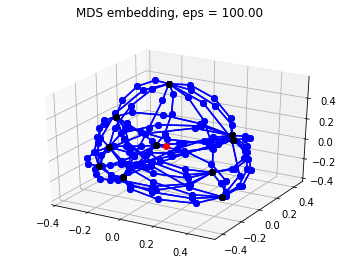

In [17]:
sub = generate_gr_lattice(10,2, eps=100, num=10)

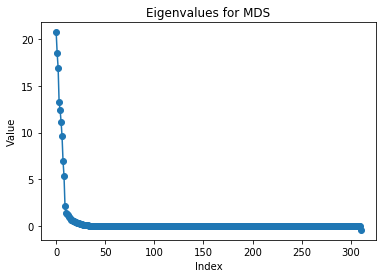

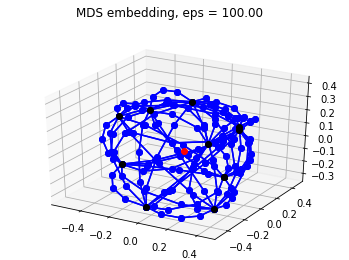

In [18]:
sub = generate_gr_lattice(10,2, eps=100, num=10)

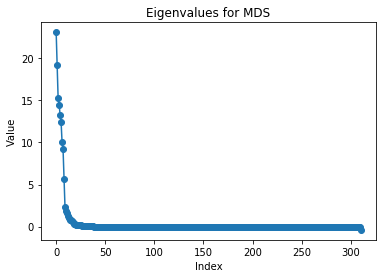

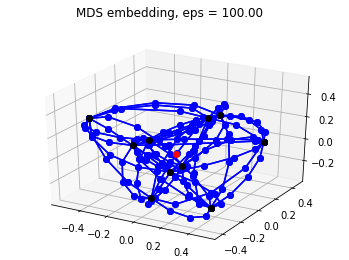

In [19]:
sub = generate_gr_lattice(10,2, eps=100, num=10)

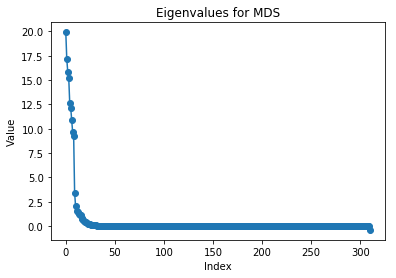

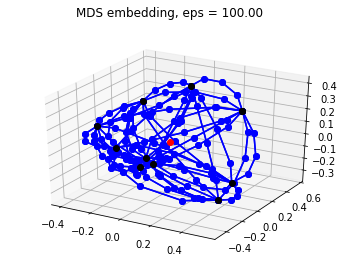

In [20]:
sub = generate_gr_lattice(10,2, eps=100, num=10)